In [1]:
%pylab inline

def sense(x):
    return x

def simulate(Δt, x, u):
    x += Δt * u
    return x

def control(t, y):
    ux = -sin(t)
    uy = cos(t)
    uz = 1
    return array([ux, uy, uz])

Populating the interactive namespace from numpy and matplotlib


In [2]:
tf = 20
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([1., 0., 0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = np.array(x_log)

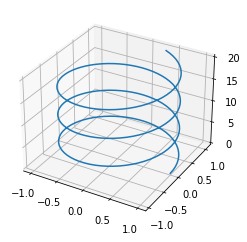

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = plt.axes(projection="3d")
ax = ax.plot3D(x_log[:,0], x_log[:,1], x_log[:,2])
plt.show()

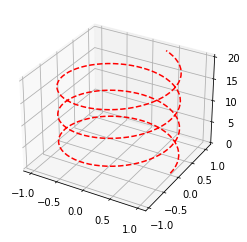

AttributeError: 'list' object has no attribute 'plot3D'

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    
fig = plt.figure()

def animate(t):
    ax = plt.axes(projection="3d")
    ax.clear()
    
    # Path
    ax = ax.plot3D(x_log[:,0], x_log[:,1], x_log[:,2], 'r--')
    plt.show()
    
    # Initial conditions
    ax = ax.plot3D(x_log[t,0], x_log[t,1], x_log[t,2], 'bo')
    plt.show()
    
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())